In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C://Users//Dell_USA//Downloads//diabetes.csv")
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [4]:
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [5]:
df.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

<Axes: >

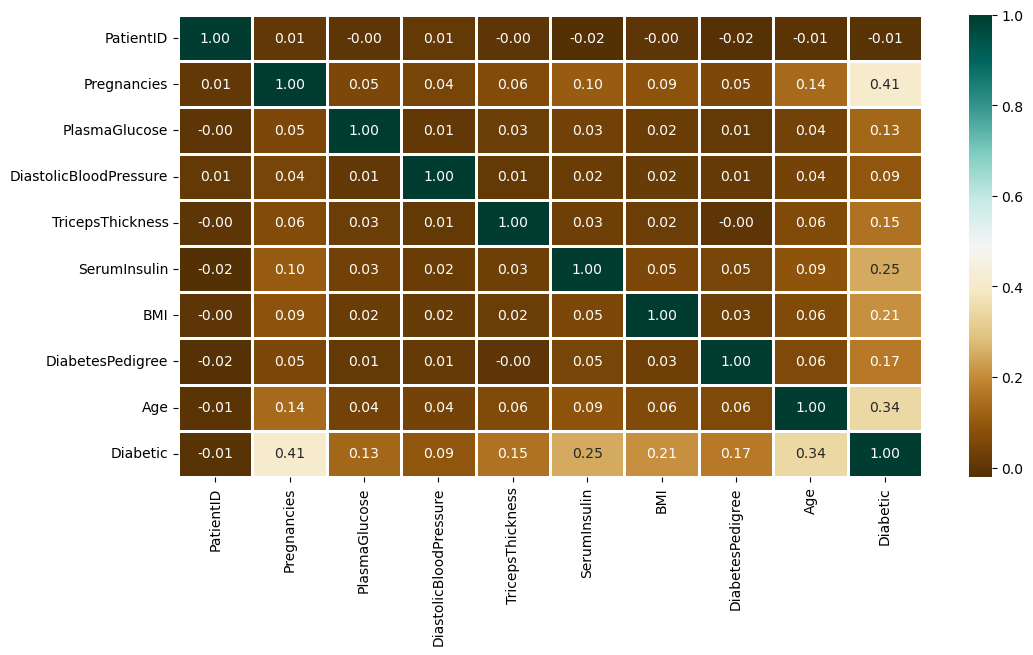

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [8]:
result = df.copy()
max_value = df['Pregnancies'].max()
min_value = df['Pregnancies'].min()
result['Pregnancies'] = (df['Pregnancies'] - min_value) / (max_value - min_value)

max_value = df['PlasmaGlucose'].max()
min_value = df['PlasmaGlucose'].min()
result['PlasmaGlucose'] = (df['PlasmaGlucose'] - min_value) / (max_value - min_value)

max_value = df['DiastolicBloodPressure'].max()
min_value = df['DiastolicBloodPressure'].min()
result['DiastolicBloodPressure'] = (df['DiastolicBloodPressure'] - min_value) / (max_value - min_value)

max_value = df['TricepsThickness'].max()
min_value = df['TricepsThickness'].min()
result['TricepsThickness'] = (df['TricepsThickness'] - min_value) / (max_value - min_value)

max_value = df['SerumInsulin'].max()
min_value = df['SerumInsulin'].min()
result['SerumInsulin'] = (df['SerumInsulin'] - min_value) / (max_value - min_value)

max_value = df['BMI'].max()
min_value = df['BMI'].min()
result['BMI'] = (df['BMI'] - min_value) / (max_value - min_value)

max_value = df['DiabetesPedigree'].max()
min_value = df['DiabetesPedigree'].min()
result['DiabetesPedigree'] = (df['DiabetesPedigree'] - min_value) / (max_value - min_value)

max_value = df['Age'].max()
min_value = df['Age'].min()
result['Age'] = (df['Age'] - min_value) / (max_value - min_value)

In [9]:
from sklearn.model_selection import train_test_split
features=["Pregnancies","PlasmaGlucose","TricepsThickness","SerumInsulin","BMI","DiabetesPedigree","Age"]
X=df[features]
y=df.Diabetic
train_X, test_X, train_y, test_y = train_test_split(X, y,train_size=0.8, test_size=0.2)

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

model1=DecisionTreeRegressor(random_state=1)
model1.fit(train_X, train_y)
pred1=model1.predict(test_X)
print(metrics.accuracy_score(test_y, pred1))
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred1)))

0.9
Mean Absolute Error: 0.100000


In [11]:
#pred2 = model.predict([0,])